# Random Forest w/o Feature Engineering

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [ ]:
# Read in the unengineered feature set 
df = pd.read_csv('./cleaned_df.csv')
df.head(3)

,age,height,weight,ap_hi,ap_lo,BMI,MAP,gender_1,gender_2,cholesterol_1,...,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1,cardio
0,18393,168,62.0,110,80,21.967,90.000,0,1,1,...,1,0,0,1,0,1,0,0,1,0
1,20228,156,85.0,140,90,34.928,106.667,1,0,0,...,1,0,0,1,0,1,0,0,1,1
2,18857,165,64.0,130,70,23.508,90.000,1,0,0,...,1,0,0,1,0,1,0,1,0,1


In [ ]:
# Create the BMI column since it didn't make it into the feature set
df["BMI"] = round(df["weight"] / (df["height"]/100)**2,3)

In [ ]:
# Create the BMI column since it didn't make it into the feature set
#MAP = DP + 1/3(SP – DP)
df["MAP"] = round(df['ap_lo'] + ((df['ap_hi']-df['ap_lo'])/3),3)

In [ ]:
# Assign features and target
X = df.drop('cardio', axis=1)
y = df.cardio

In [ ]:
# Train test split the data
X_train,X_test,y_train,y_test = train_test_split(X,y, train_size=0.8, random_state=0, stratify=y)
X_train.head(3)

,age,height,weight,ap_hi,ap_lo,BMI,MAP,gender_1,gender_2,cholesterol_1,...,cholesterol_3,gluc_1,gluc_2,gluc_3,smoke_0,smoke_1,alco_0,alco_1,active_0,active_1
17802,17532,154,70.0,180,110,29.516,133.333,1,0,1,...,0,1,0,0,1,0,1,0,0,1
26207,22219,160,60.0,120,80,23.437,93.333,1,0,1,...,0,1,0,0,1,0,1,0,1,0
15874,22741,174,69.0,125,80,22.790,95.000,0,1,1,...,0,1,0,0,1,0,1,0,0,1


In [ ]:
# Try to optimize a random forest using both n_estimators and max_depth hyperparameters
B = np.arange(10,500,50)
D = np.arange(1, 20, 3)
grid = {'n_estimators':B, 'max_depth':D}

rf = RandomForestClassifier(oob_score=True)
rfCV = GridSearchCV(rf,param_grid=grid, return_train_score=True, n_jobs=-1)
rfCV.fit(X_train, y_train.values.ravel()) # NOTE: .ravel() must be used to avoid an error

GridSearchCV(estimator=RandomForestClassifier(oob_score=True), n_jobs=-1,
             param_grid={'max_depth': array([ 1,  4,  7, 10, 13, 16, 19]),
                         'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460])},
             return_train_score=True)

In [ ]:
# Best number of trees
rfCV.best_params_

{'max_depth': 10, 'n_estimators': 360}

In [ ]:
# Best Train accuracy from 290 trees
print('Training accuracy', rfCV.best_score_.round(3))

Training accuracy 0.735


In [ ]:
# Score the test sets
print('Validation accuracy', rfCV.score(X_test, y_test).round(3))

Validation accuracy 0.728


In [ ]:
# Get the out-of-bag score
print('OOB score', rfCV.best_estimator_.oob_score_.round(3))

OOB score 0.735


In [ ]:
# Rerun but this time with num of estimators increased so we can plot
B = np.arange(10,1000,50)
grid = {'n_estimators':B}

rf = RandomForestClassifier(oob_score=True, max_depth=10)
rfCV2 = GridSearchCV(rf,param_grid=grid, return_train_score=True, n_jobs=-1)
rfCV2.fit(X_train, y_train.values.ravel()) # NOTE: .ravel() must be used to avoid an error

GridSearchCV(estimator=RandomForestClassifier(max_depth=10, oob_score=True),
             n_jobs=-1,
             param_grid={'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
             return_train_score=True)

In [ ]:
# Best train accuracy
print('Training accuracy', rfCV2.best_score_.round(3))

Training accuracy 0.735


In [ ]:
# Best validation accuracy
print('Validation accuracy', rfCV2.best_estimator_.score(X_test, y_test).round(3))

Validation accuracy 0.729


In [ ]:
# Get Out-Of-Bag score
print('OOB score', rfCV2.best_estimator_.oob_score_.round(3))

OOB score 0.734


<Axes: xlabel='trees'>

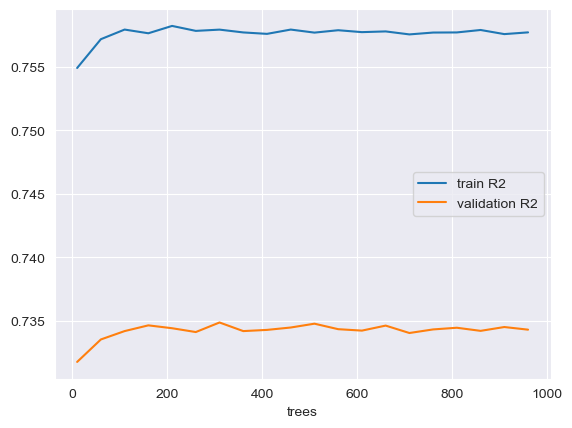

In [ ]:
# Plot results
results = pd.DataFrame()
results['trees'] = grid['n_estimators']
results['train R2'] = rfCV2.cv_results_['mean_train_score']
results['validation R2'] = rfCV2.cv_results_['mean_test_score']

results.plot.line(x='trees', y=['train R2', 'validation R2'])